In [1]:
from SliceNet import SliceNet
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

W0503 02:00:03.255938 140274061629184 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


1.13.1


Using TensorFlow backend.


importing hub
Instructions for updating:
Colocations handled automatically by placer.


W0503 02:00:55.284607 140274061629184 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [2]:
# Wiki Train Set
dataPath = Path('/home/bmmidei/SliceCast/data/train/hdf5_noIntro')

# Podcast Data Set
#dataPath = Path('/home/bmmidei/SliceCast/data/podcasts/hdf5')

files = [str(x) for x in dataPath.glob('**/*') if x.suffix=='.hdf5']

val_prop = 0.25
mask = random.sample(range(0,len(files)), math.floor(val_prop*len(files)))

# randomly assign some files to validation and the rest to train
train_files = [x for (i,x) in enumerate(files) if i not in mask]
val_files = [x for (i,x) in enumerate(files) if i in mask]
test_file = val_files[0]
print(test_file)

/home/bmmidei/SliceCast/data/train/hdf5_noIntro/batch2_2.hdf5


In [3]:
weights_path = '/home/bmmidei/SliceCast/models/05_02_2019_2000_attn.h5'
class_weights = [1.0, 7.0, 0.2]
net = SliceNet(classification=True,
               class_weights=class_weights,
               pretrain=False,
               weights_path=None,
               maxlen=None,
               attention=True,
               drop_prob=0,
               reg=1e-2)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0503 02:01:26.302116 140274061629184 saver.py:1483] Saver not created because there are no variables in the graph to restore


In [4]:
history, pkscores = net.train(train_files=train_files,
                        val_files=val_files,
                        test_file=test_file,
                        batch_size=8,
                        epochs=40,
                        steps_per_epoch=1000,
                        test_steps=100,
                        save=True,
                        k=8)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoderIn (InputLayer)          (None, None)         0                                            
__________________________________________________________________________________________________
encoderOut (Lambda)             (None, None, 512)    0           encoderIn[0][0]                  
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, None, 1)      513         encoderOut[0][0]                 
__________________________________________________________________________________________________
multiply_1 (Multiply)           (None, None, 512)    0           encoderOut[0][0]                 
                                                                 time_distributed_1[0][0]         
__________

W0503 02:02:16.080454 140274061629184 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Epoch 1/40
1000/1000 [==============================] - 971s 971ms/step - loss: 0.7870 - categorical_accuracy: 0.9583 - val_loss: 0.8393 - val_categorical_accuracy: 0.9554
PK Score for epoch 1 is 0.5830
Epoch 2/40
1000/1000 [==============================] - 900s 900ms/step - loss: 0.6424 - categorical_accuracy: 0.9612 - val_loss: 0.7423 - val_categorical_accuracy: 0.9108
PK Score for epoch 2 is 0.3458
Epoch 3/40
1000/1000 [==============================] - 837s 837ms/step - loss: 0.5937 - categorical_accuracy: 0.9296 - val_loss: 0.6939 - val_categorical_accuracy: 0.9181
PK Score for epoch 3 is 0.3265
Epoch 4/40
 157/1000 [===>..........................] - ETA: 12:29 - loss: 0.5855 - categorical_accuracy: 0.9306

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1000/1000 [==============================] - 1081s 1s/step - loss: 0.5419 - categorical_accuracy: 0.9432 - val_loss: 0.6662 - val_categorical_accuracy: 0.9287
PK Score for epoch 9 is 0.3253
Epoch 10/40
1000/1000 [==============================] - 930s 930ms/step - loss: 0.5395 - categorical_accuracy: 0.9445 - val_loss: 0.7280 - val_categorical_accuracy: 0.9033
PK Score for epoch 10 is 0.3406
Epoch 11/40
1000/1000 [==============================] - 908s 908ms/step - loss: 0.5440 - categorical_accuracy: 0.9454 - val_loss: 0.7171 - val_categorical_accuracy: 0.9106
PK Score for epoch 11 is 0.2852
Epoch 12/40
 477/1000 [=============>................] - ETA: 9:10 - loss: 0.5379 - categorical_accuracy: 0.9456

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1000/1000 [==============================] - 871s 871ms/step - loss: 0.5273 - categorical_accuracy: 0.9489 - val_loss: 0.6698 - val_categorical_accuracy: 0.9327
PK Score for epoch 18 is 0.2926
Epoch 19/40
1000/1000 [==============================] - 945s 945ms/step - loss: 0.5387 - categorical_accuracy: 0.9476 - val_loss: 0.6408 - val_categorical_accuracy: 0.9467
PK Score for epoch 19 is 0.2885
Epoch 20/40
1000/1000 [==============================] - 855s 855ms/step - loss: 0.5310 - categorical_accuracy: 0.9493 - val_loss: 0.6306 - val_categorical_accuracy: 0.9401
PK Score for epoch 20 is 0.2664
Epoch 21/40
 214/1000 [=====>........................] - ETA: 10:39 - loss: 0.5330 - categorical_accuracy: 0.9496

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1000/1000 [==============================] - 989s 989ms/step - loss: 0.5234 - categorical_accuracy: 0.9509 - val_loss: 0.6836 - val_categorical_accuracy: 0.9279
PK Score for epoch 25 is 0.3015
Epoch 26/40
1000/1000 [==============================] - 882s 882ms/step - loss: 0.5282 - categorical_accuracy: 0.9512 - val_loss: 0.6888 - val_categorical_accuracy: 0.9343
PK Score for epoch 26 is 0.3119
Epoch 27/40
1000/1000 [==============================] - 952s 952ms/step - loss: 0.5229 - categorical_accuracy: 0.9524 - val_loss: 0.6352 - val_categorical_accuracy: 0.9403
PK Score for epoch 27 is 0.2902
Epoch 28/40
 624/1000 [=================>............] - ETA: 7:14 - loss: 0.5176 - categorical_accuracy: 0.9526

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1000/1000 [==============================] - 946s 946ms/step - loss: 0.5173 - categorical_accuracy: 0.9533 - val_loss: 0.6759 - val_categorical_accuracy: 0.9370
PK Score for epoch 33 is 0.2939
Epoch 34/40
1000/1000 [==============================] - 861s 861ms/step - loss: 0.5218 - categorical_accuracy: 0.9522 - val_loss: 0.7038 - val_categorical_accuracy: 0.9348
PK Score for epoch 34 is 0.2481
Epoch 35/40
1000/1000 [==============================] - 965s 965ms/step - loss: 0.5192 - categorical_accuracy: 0.9525 - val_loss: 0.5871 - val_categorical_accuracy: 0.9463
PK Score for epoch 35 is 0.3240
Epoch 36/40
 170/1000 [====>.........................] - ETA: 13:54 - loss: 0.5014 - categorical_accuracy: 0.9553

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1000/1000 [==============================] - 1042s 1s/step - loss: 0.5156 - categorical_accuracy: 0.9544 - val_loss: 0.5988 - val_categorical_accuracy: 0.9418
PK Score for epoch 40 is 0.2911
Saved weights to disk


In [5]:
pkscores.on_train_end()

[0.5830449173530529,
 0.3457754951046518,
 0.3265167592355809,
 0.3212444986221809,
 0.3224165923179254,
 0.3321310439162231,
 0.3037251736200564,
 0.3263724118152136,
 0.3253345098059093,
 0.3406498139343859,
 0.28518840618233393,
 0.32955565862333136,
 0.32041618840440406,
 0.29917906516947634,
 0.3143777106324841,
 0.30256047418077814,
 0.30946566107564416,
 0.2926091652740933,
 0.28850247389825745,
 0.26640921316272254,
 0.2868019820518581,
 0.2709655668637391,
 0.2946015364739834,
 0.29013915824705927,
 0.30150158944435135,
 0.3119477546265116,
 0.290188048992902,
 0.3192460815534551,
 0.3507880423315325,
 0.29220638995285786,
 0.30509736580050617,
 0.32500012799854633,
 0.29393403654039213,
 0.2481005028229539,
 0.3240147815183317,
 0.28853219380190726,
 0.3102782335875117,
 0.31015377169723113,
 0.27472541714264764,
 0.29107063104683745]

# Visualizing Results

## Loss and Accuracy during training

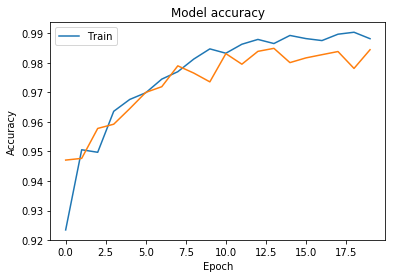

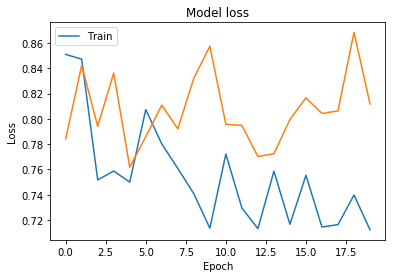

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()